<div style="text-align: center;">
<h1>The University of North Carolina at Chapel Hill</h1>
<h1>Comp 555 BioAlgorithms - Spring 2020</h1>
<h1 style="font-size: 250%;">Problem Set #1 </h1>
<h1 style="font-size: 150%;">Version 1.0</h1>
<h1>Issued Tuesday, 1/21/2020; Due Tuesday, 2/4/2020</h1>
</div>

**Homework Information:** Some of the problems are probably too long to be done the night before the due date, so plan accordingly. Late problem sets will be penalized by a factor of	70.71% for up to two class meetings after the due date. Feel free to get help from others, but **the work you submit in should be your own.** It is very important that you enter your answers in the provided cells. You can add extra cells to explore approaches, but only the provided cell can and will be graded.

**Warning:** This notebook has been annotated with metadata so that it can be uploaded to the grading system. Thus, if you delete a cell and add a replacement, there is a possiblity that your problem will not be graded. If you ever need to start over, you should download a new version of the problem set and transfer your solutions to it.

In [3]:
# Replace the following string values with the requested information
# Leave the quotation marks surronding the string!
class Student:
    first = "Komal"
    last = "Essarani"
    onyen = "kessara0"
    pid = "730235611"

This problem set will examine two genomes <a href="http://csbio.unc.edu/mcmillan/Comp555S19/data/GenomeA.fa" download="GenomeA">GenomeA.fa</a> and <a href="http://csbio.unc.edu/mcmillan/Comp555S19/data/GenomeB.fa" download="GenomeB">GenomeB.fa</a>. One is the genome of an actual organism, the other is a random seqence of nucleotides. Some answers are provided in order to test your code for the genome of <a href="http://csbio.unc.edu/mcmillan/Comp555S19/data/ThermotogaPetrophila.fa" download="ThermotogaPetrophila.fa">ThermotogaPetrophila.fa</a> from Lecture 3.

The cell below provides various functions and imports necessary for this problem set. Do not import any addtional packages. Also, make sure that you ***run the following cell***.

In [3]:
import gzip
import itertools
import math
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def loadFasta(filename):
    """ Parses a classically formatted and possibly 
        compressed FASTA file into two lists. One of 
        headers and a second list of sequences.
        The ith index of each list correspond."""
    if (filename.endswith(".gz")):
        fp = gzip.open(filename, 'r')
    else:
        fp = open(filename, 'r')
    # split at headers
    data = fp.read().split('>')
    fp.close()
    # ignore whatever appears before the 1st header
    data.pop(0)     
    headers = []
    sequences = []
    for sequence in data:
        lines = sequence.split('\n')
        headers.append(lines.pop(0))
        # add an extra "+" to make string "1-referenced"
        sequences.append('+' + ''.join(lines))
    return (headers, sequences)

---
**Problem #1:**

Write a function that produces a list of the smallest ***missing*** <em>k</em>-mers from a given sequence, *seq*, where all possible *(k-1)*-mers appear. A template for the function is provided in the cell below. This cell should include ***only your function*** definition. A cell for testing is provided after.

In [4]:
# This cell is graded
import itertools

def kmerCounts(seq, k):
    kmerDict = {}
    for i in range(1,len(seq)-k+1):
        kmer = seq[i:i+k]
        kmerDict[kmer] = kmerDict.get(kmer,0) + 1
    return kmerDict

def shortestMissingKmers(seq):
    """ Returns a list of missing k-mers, for the 
    smallest value of k for which a k-mer is missing."""
    missing  = []
    kmers = {}
           
    for k in range(len(seq)):
        kmers = kmerCounts(seq, k)
        missNum = 4**k-len(kmers)
        if(missNum > 0):
            for number in itertools.product(("A", "C", "G", "T"), repeat=k):
                if("".join(number) not in list(kmers.keys())):
                    missing.append("".join(number))
            return missing 

The following cell below is provided for testing your code. You should test it on both GenomeA and GenomeB. This cell will not be considered during grading.

In [28]:
header, sequence = loadFasta("data/ThermotogaPetrophila.fa")
print(shortestMissingKmers(sequence[0]))
# The correct answer is: ['ACTAGAC', 'CCTAGAC', 'TACTAGT', 'TGACTAG']

['ACTAGAC', 'CCTAGAC', 'TACTAGT', 'TGACTAG']


---
**Problem #2:**

Write a function that returns a list of *k*-mers that appear exactly once for a given value of *k* in a given sequence *seq*. A template for the function is provided in the cell below. Once more, only include your function implementation in the cell below.

In [8]:
# This cell is graded
def NotRepeated(seq, k):
    onceList = []
    kmerDict = {}
    for i in range(1,len(seq)-k+1):
        kmer = seq[i:i+k]
        kmerDict[kmer] = kmerDict.get(kmer,0) + 1
    
    for item in kmerDict.items():
        if item[1] == 1:
            onceList.append(item[0])
            
    return onceList

Use the following cell to test your function. Run it on GenomeA and GenomeB, and plot separate k-mer frequencies for each on a semilog scale.

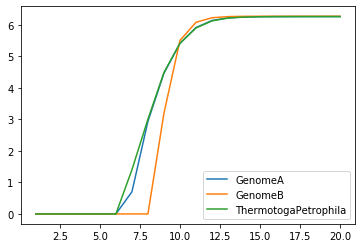

In [25]:
header, sequence = loadFasta("data/GenomeA.fa")
unique = []
for k in range(1,21):
    singletons = NotRepeated(sequence[0], k)
    unique.append(math.log10(len(singletons)+1))
plt.plot(range(1,21), unique, label = "GenomeA")

header, sequence = loadFasta("data/GenomeB.fa")
unique = []
for k in range(1,21):
    singletons = NotRepeated(sequence[0], k)
    unique.append(math.log10(len(singletons)+1))
plt.plot(range(1,21), unique, label = "GenomeB")

header, sequence = loadFasta("data/ThermotogaPetrophila.fa")
unique = []
for k in range(1,21):
    singletons = NotRepeated(sequence[0], k)
    unique.append(math.log10(len(singletons)+1))
plt.plot(range(1,21), unique, label = "ThermotogaPetrophila")

plt.legend()

A correct implementation of kmerFrequency() when called by the following code:
```python
header, sequence = loadFasta("data/ThermotogaPetrophila.fa")

unique = []
for k in range(1,21):
    singletons = NotRepeated(sequence[0], k)
    unique.append(math.log10(len(singletons)+1))
plt.plot(range(1,21), unique)
```

should generate the following output:

<img src="http://csbio.unc.edu/mcmillan/Media/PS01S20Fig1.png" />


---
**Problem #3:**

Use your NotRepeated( ) function from Problem #2 to find the smallest value of k where the number of non-repeated k-mers is more than 90% of the k-mers in the genome.

In [9]:
# This cell is graded
def unique90(seq):
#     l = []
    for k in range(len(seq)):
        kmers = kmerCounts(seq, k)
        total = len(kmers)
        numNotRepeat = len(NotRepeated(seq, k))
        #repeated = total - numNotRepeat
        if (numNotRepeat/total) * 100 > 90:
            return k

Use the following Cell to test your function.

In [10]:
header, sequence = loadFasta("data/ThermotogaPetrophila.fa")
print(unique90(sequence[0]))

header, sequence = loadFasta("data/GenomeA.fa")
print(unique90(sequence[0]))

header, sequence = loadFasta("data/GenomeB.fa")
print(unique90(sequence[0]))

13
13
12


---
**Problem #4:**

Plot the C-G skew plot as shown in class for both GenomeA and GenomeB. Plot the result and use the returned array of counts to estimate a 1000-bp interval that you would predict to contain the *OriR* locus. In the cell below enter your code to plot the C-G skew plots and your prediction of the *OriR* interval for both GenomeA and GenomeB.

In [15]:
# This cell is graded
def getGCdiff(sequence, start):
    halflen = len(sequence)//2
    terC = start + halflen
    # handle genome's circular nature
    if (terC > len(sequence)):
        terC = terC - len(sequence) + 1
    if (terC > start):                                   # case 1: ----S========T---->
        G = 2*sequence[start:terC].count('G') - sequence.count('G')
        C = 2*sequence[start:terC].count('C') - sequence.count('C')
    else:                                                # case 2: ====T--------S====>
        G = sequence.count('G') - 2*sequence[terC:start].count('G')
        C = sequence.count('C') - 2*sequence[terC:start].count('C')
    return G - C

def GCSkew(genome):
    x = []
    y = []
    for i in range(1,len(genome),500):
        x.append(i)
        y.append(getGCdiff(genome,i))
    return x, y

def GCSkewRefine(genome, start, end):
    x = []
    y = []
    for i in range(start, end):
        x.append(i)
        y.append(getGCdiff(genome,i))
    return x, y

GenomeA data:
It ranges from 2001 to 3001
The max is 2501
The refined range is from 2322 to 3322
The refined max is 2822

GenomeB data:
It ranges from 1269501 to 1270501
The max is 1270001
The refined range is from 1269591 to 1270591
The refined max is 1270091


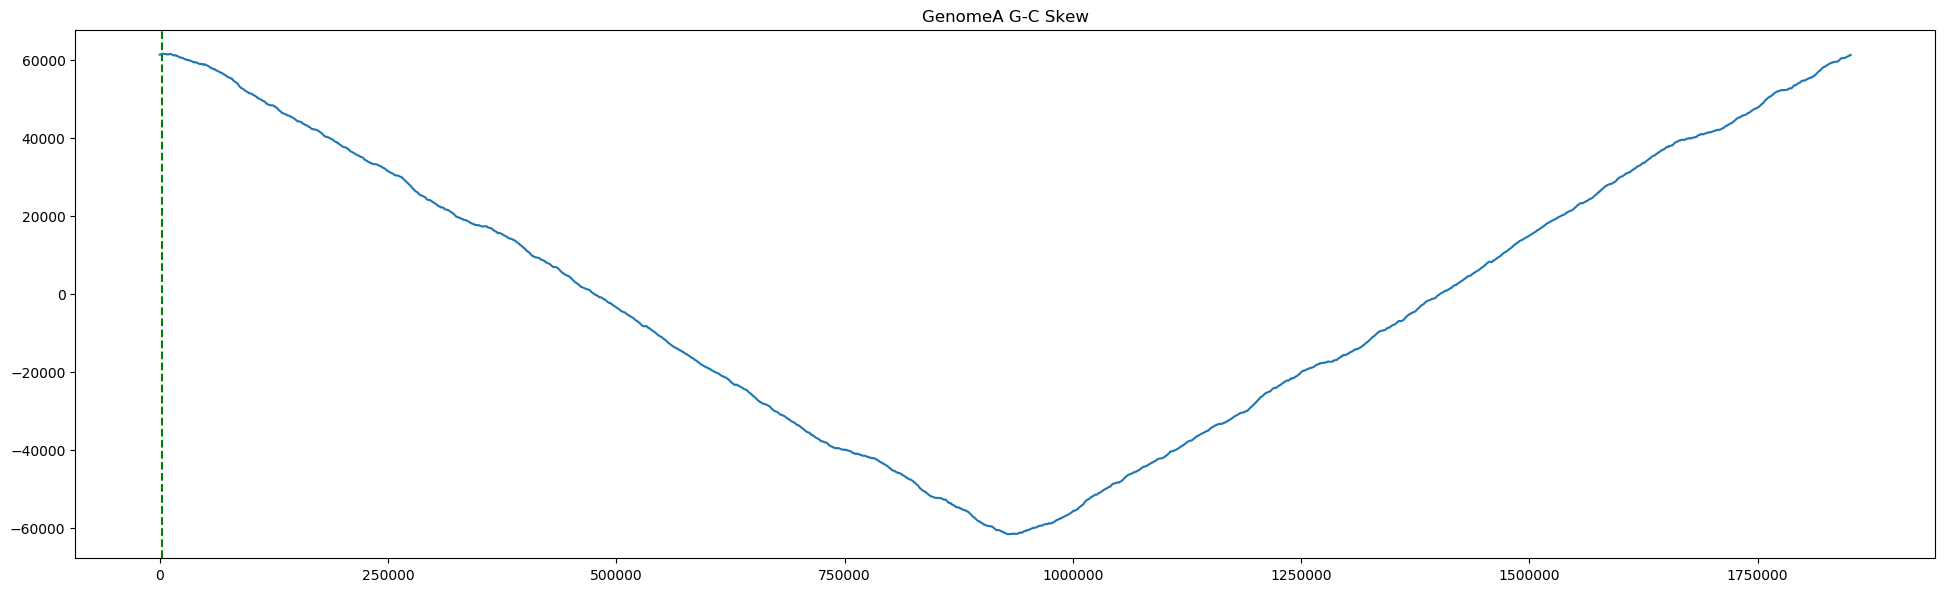

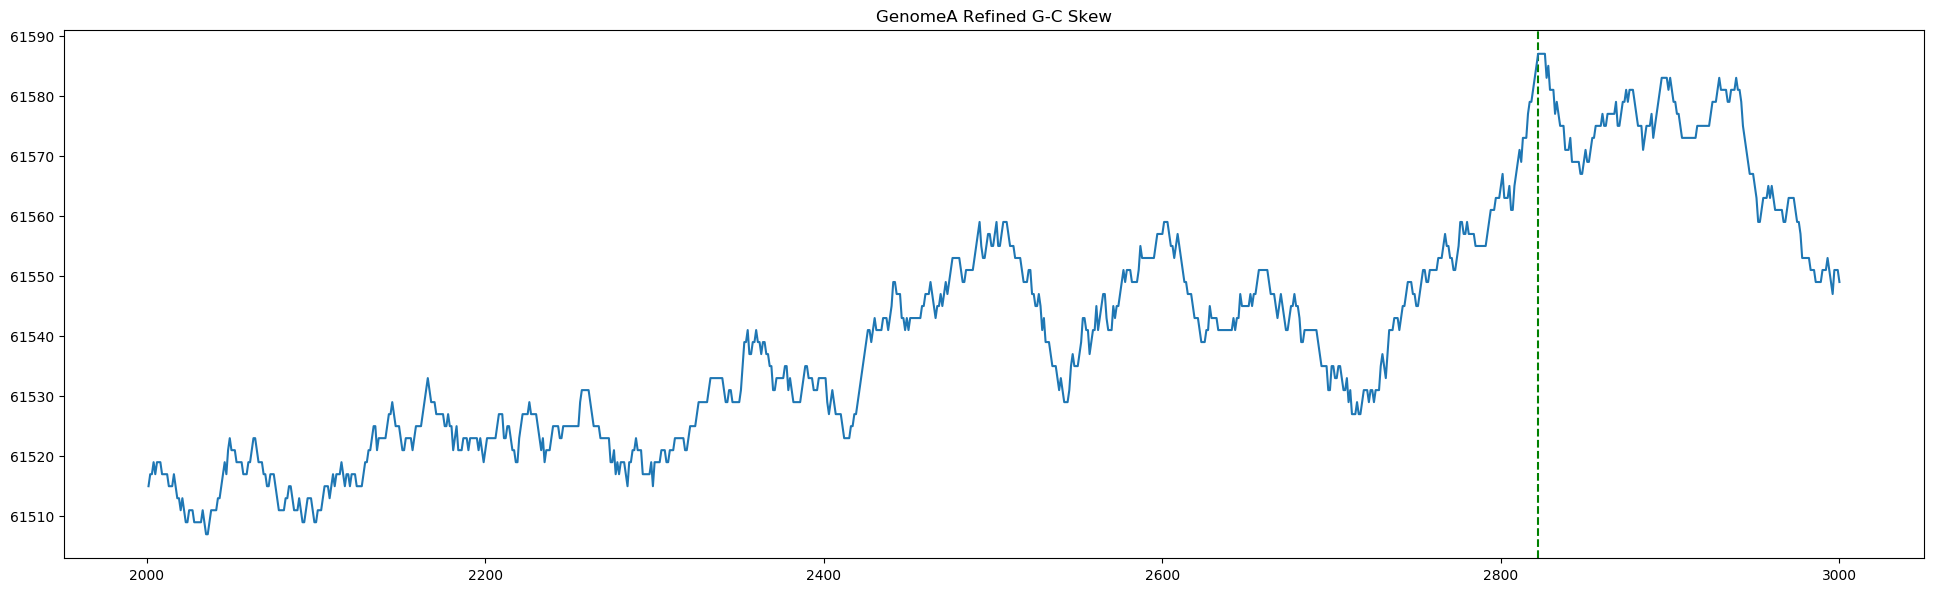

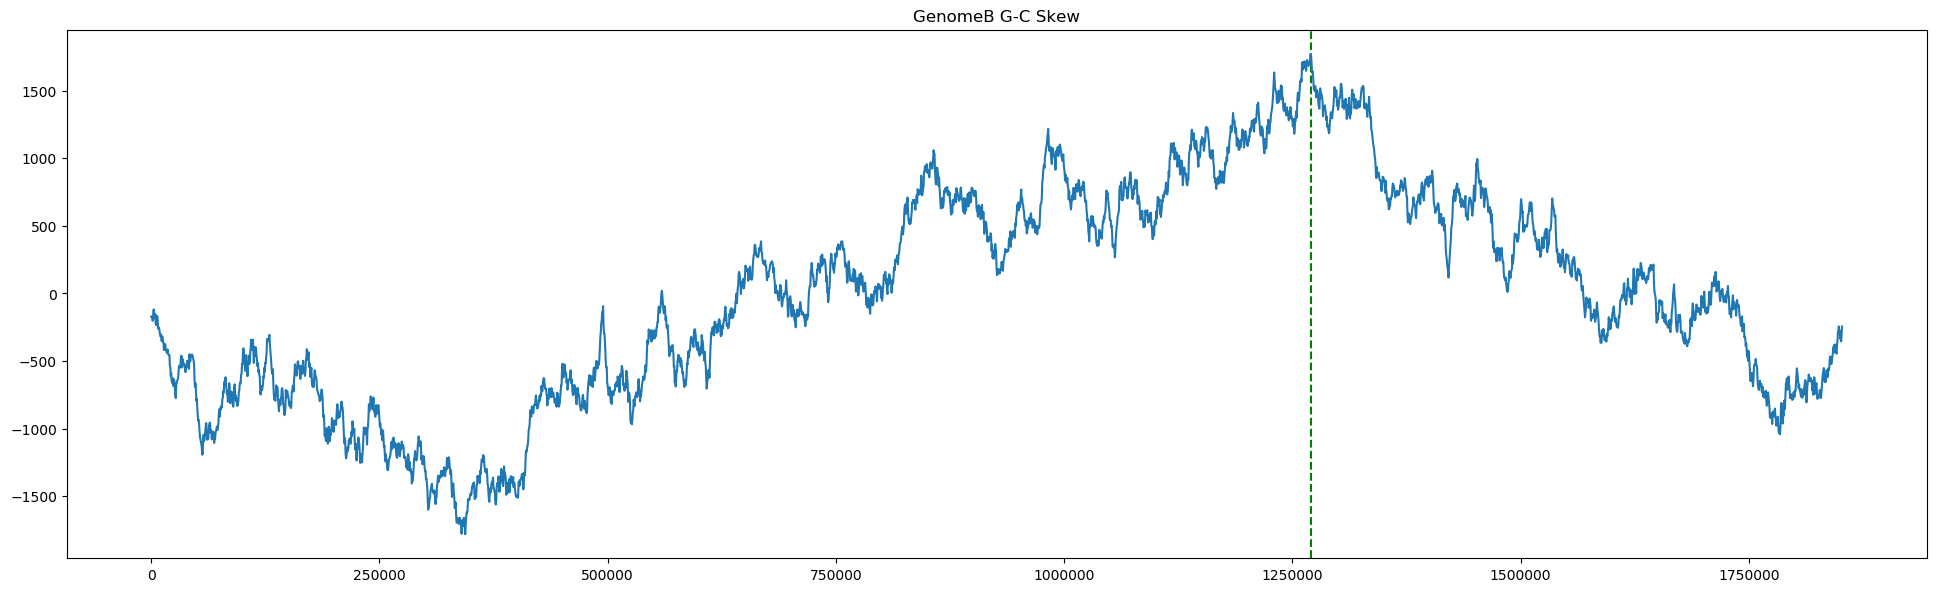

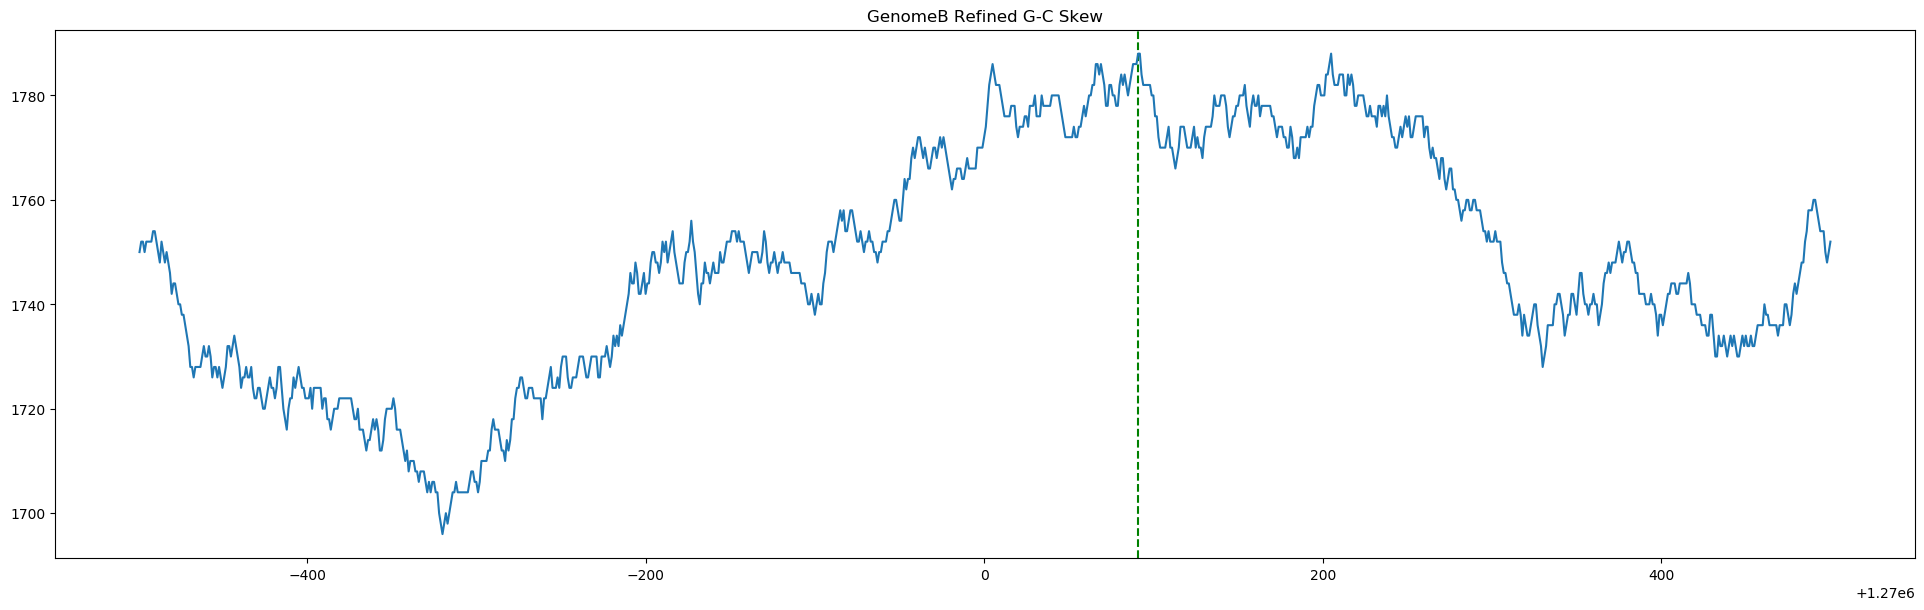

In [17]:
print("GenomeA data:")
header, seq = loadFasta("GenomeA.fa")
x, y = GCSkew(seq[0])
yargmax = y.index(max(y))
plt.figure(num=None, figsize=(24, 7), dpi=100)
plt.axvline(x[yargmax], color="g", linestyle='--')
plt.title('GenomeA G-C Skew')
plt.plot(x, y)
print("It ranges from", x[yargmax]-500, "to", x[yargmax]+500)
print("The max is", x[yargmax])

header, seq = loadFasta("GenomeA.fa")
x, y = GCSkewRefine(seq[0], x[yargmax]-500, x[yargmax]+500)
yargmax = y.index(max(y))
plt.figure(num=None, figsize=(24, 7), dpi=100)
plt.axvline(x[yargmax], color="g", linestyle='--')
plt.title('GenomeA Refined G-C Skew')
plt.plot(x, y)
print("The refined range is from", x[yargmax]-500, "to", x[yargmax]+500)
print("The refined max is", x[yargmax])


print("\nGenomeB data:")
header, seq = loadFasta("GenomeB.fa")
x, y = GCSkew(seq[0])
yargmax = y.index(max(y))
plt.figure(num=None, figsize=(24, 7), dpi=100)
plt.axvline(x[yargmax], color="g", linestyle='--')
plt.title('GenomeB G-C Skew')
plt.plot(x, y)
print("It ranges from", x[yargmax]-500, "to", x[yargmax]+500)
print("The max is", x[yargmax])


header, seq = loadFasta("GenomeB.fa")
x, y = GCSkewRefine(seq[0], x[yargmax]-500, x[yargmax]+500)
yargmax = y.index(max(y))
plt.figure(num=None, figsize=(24, 7), dpi=100)
plt.axvline(x[yargmax], color="g", linestyle='--')
plt.title('GenomeB Refined G-C Skew')
plt.plot(x, y)
print("The refined range is from", x[yargmax]-500, "to", x[yargmax]+500)
print("The refined max is", x[yargmax])

Many examples related to C-G skew can be found in the Lecture 3 notebook.

---
**Problem #5:**

Consider the tools that you have developed in problems 1-4 to predict which of GenomeA and GenomeB is real. In the cell provided below explain your reasoning as it relates to each tool.

---

## Instructions for submitting your problem set

When you are ready to submit a version of your problem set, follow the instructions below.

1. Press [Save and Checkpoint] on the *File* menu of your Jupyter notebook.
2. Press the link below, which will take you to a website for submitting your problem set.
3. Choose the ***correct problem set number*** from the pull-down, else you might overwrite an earlier submission.
4. Enter in your onyen and PID in the form provided, then upload your submission.

Click [here to submit](http://csbio.unc.edu/mcmillan/index.py?run=PS.upload) your completed problem set

**Instructions for resubmissions:**

1. You may resubmit as many times as you like before the deadline. 
2. Resubmissions *always* overwrite any earlier submissions. 
3. If you resubmit after the due date, you will be warned of any penalties. 
4. Problem sets will not be regraded.